In [30]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
sns.set(context="notebook", palette="deep")
%matplotlib inline

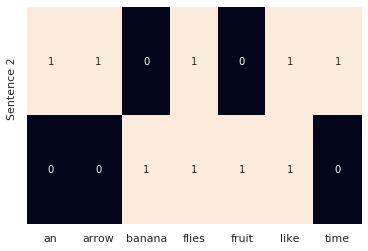

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [31]:
# TERM FREQUENCY REPRESENTATION
corpus = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']


corpus = ['Time flies like an arrow.', 'Fruit flies like a banana.']
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer. get_feature_names()
sns.heatmap(one_hot, annot=True,
cbar=False, xticklabels=vocab,
yticklabels=['Sentence 2']);
plt.show()
plt.close()
plt.figure(clear=True)

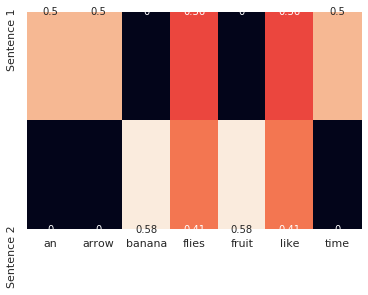

In [34]:
# INVERSE DOCUMENT TF REPRESENTATION 
from sklearn.feature_extraction.text import TfidfVectorizer
 
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels= ['Sentence 1', 'Sentence 2'])
plt.show()
plt.close();

In [13]:
def describe(x):
    print("Type: {}".format(x.type()))
    print("Shape/size: {}".format(x.shape))
    print("Values: \n{}".format(x))

In [14]:
describe(torch.Tensor(2, 3)) # uniform , nondescript
describe(torch.rand(2,3)) # uniform random [0, 1)
describe(torch.randn(2,3)) # uniform random normal dist

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[9.8855e-11, 3.0922e-41, 3.7835e-44],
        [0.0000e+00,        nan, 0.0000e+00]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.5847, 0.5876, 0.7013],
        [0.7634, 0.7809, 0.0775]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-0.1761, -0.5883,  1.4180],
        [-0.8134,  0.0088,  0.4935]])


In [55]:
describe(torch.zeros(2,3))
x = torch.ones(2,3)
describe(x)
x.fill_(5) # underscore methods operate in place
describe(x)x
x = x.long() # change data types
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])
Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[5, 5, 5],
        [5, 5, 5]])


In [51]:
pls = torch.Tensor([1,2,3,4,5,6,7])
describe(pls)
npy = np.random.rand(2,3) # create tensor from np array
describe(torch.from_numpy(npy))

Type: torch.FloatTensor
Shape/size: torch.Size([7])
Values: 
tensor([1., 2., 3., 4., 5., 6., 7.])
Type: torch.DoubleTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.7018, 0.1112, 0.2847],
        [0.9138, 0.4031, 0.0686]], dtype=torch.float64)


In [58]:
x = torch.tensor([1,2,3,4,5,6], dtype=torch.int64)
describe(x)
x = x.float() # Change data types
describe(x)

### IMPORTANT DEBUGGING TOOLS!
x.shape
x.size()

Type: torch.LongTensor
Shape/size: torch.Size([6])
Values: 
tensor([1, 2, 3, 4, 5, 6])
Type: torch.FloatTensor
Shape/size: torch.Size([6])
Values: 
tensor([1., 2., 3., 4., 5., 6.])


torch.Size([6])

In [62]:
# overloaded operators or methods like .add()
x = torch.randn(2, 3)
describe(torch.add(x,x))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-1.6885,  0.1353,  3.8586],
        [-0.3160,  2.0356, -2.4447]])


In [63]:
describe(x + x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-1.6885,  0.1353,  3.8586],
        [-0.3160,  2.0356, -2.4447]])


In [81]:
# dimension operations

n = torch.arange(6).float()
describe(n)

Type: torch.FloatTensor
Shape/size: torch.Size([6])
Values: 
tensor([0., 1., 2., 3., 4., 5.])


In [82]:
n = n.view(2, 3)
describe(n)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])


In [83]:
describe(torch.sum(n, dim=0))

Type: torch.FloatTensor
Shape/size: torch.Size([3])
Values: 
tensor([3., 5., 7.])


In [84]:
describe(torch.sum(n, dim=1))

Type: torch.FloatTensor
Shape/size: torch.Size([2])
Values: 
tensor([ 3., 12.])


In [101]:
describe(torch.transpose(n, 0, 1))

Type: torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[0., 3.],
        [1., 4.],
        [2., 5.]])


In [110]:
idx = torch.LongTensor([0,2])
describe(torch.index_select(n, dim=1, index=idx)) # non contiguous indexing

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[0., 2.],
        [3., 5.]])


In [109]:
indices = torch.LongTensor([0,0,0,0]) # i can keep making copies of whatever i want...
describe(torch.index_select(n, dim=0, index=indices))

Type: torch.FloatTensor
Shape/size: torch.Size([4, 3])
Values: 
tensor([[0., 1., 2.],
        [0., 1., 2.],
        [0., 1., 2.],
        [0., 1., 2.]])


In [111]:
row_idx = torch.arange(2).long() # arange = single values are all tensors in pytorch, rank 0
col_idx = torch.LongTensor([0,1]) # indices must be long dtype

describe(n[row_idx, col_idx])

Type: torch.FloatTensor
Shape/size: torch.Size([2])
Values: 
tensor([0., 4.])


In [112]:
concat_with_builtin = torch.arange(6).view(2,3)
describe(concat_with_builtin)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [115]:
describe(torch.cat([concat_with_builtin, concat_with_builtin], dim=0))
describe(torch.cat([concat_with_builtin, concat_with_builtin], dim=1))

Type: torch.LongTensor
Shape/size: torch.Size([4, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
Type: torch.LongTensor
Shape/size: torch.Size([2, 6])
Values: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [116]:
describe(torch.stack([concat_with_builtin, concat_with_builtin], dim=0))

Type: torch.LongTensor
Shape/size: torch.Size([2, 2, 3])
Values: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [120]:
# linear algebra time

x1 = torch.arange(6).view(2, 3).float()
describe(x1)

x2 = torch.ones(3, 2)
x2[:, 1] += 1
describe(x2)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])
Type: torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [121]:
# multi

describe(torch.mm(x1, x2))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[ 3.,  6.],
        [12., 24.]])
